In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from nltk.corpus import stopwords
from konlpy.tag import Hannanum
%matplotlib inline

In [2]:
DATA_IN_PATH = os.getcwd() + '\\crawling_result\\youtuber_text'
CRAWLER_PATH = os.getcwd() + '\\crawling_result'
def get_files(filepath):
    return glob.glob(os.path.join(filepath,'*.txt'))

# 현재 파일이름만 추출
#os.path.basename(filename)

In [3]:
files = get_files(DATA_IN_PATH)

data = []
file_names = [os.path.splitext(os.path.basename(x))[0] for x in files] #파일이름만 추출해 리스트에 저장

for i in files:
    f = open(i, 'rt', encoding='utf-8')
    data.append(f.read())
    f.close()

train_data = pd.Series(data, index = file_names, name='review')

In [4]:
train_data.head()

UC-Zedn7a_RJyb5hUQ-aGZog    서양권 인물의 성씨로 쓰인다.  자세한 내용은 머독(인터넷 방송인) 문서를의 번째 ...
UC1dG3vI9FfHnH3YgyeKUz_A    2015년 말부터 시작한 아프리카TV의 리그 오브 레전드 BJ. 챌린저 정글러다. ...
UC1MO5uem_t8lRgvIBF9u83w    게임 영상 투고 및 게임 번역을 주로 하는 유튜버.AI설이 나돌 정도로 과묵하고 묵...
UC1q4Ihlv_YhLELw-ijE0Diw    마인크래프트를 주로 하는 팀 샐러드 소속의 유튜버이자 트위치 스트리머.마인애플은 마...
UC2FDVyrQnjoZCUyk9fmqd9g    2015년 5월 중순[12]부터 본격적으로 방송을 시작한 크로아티아 출신[13] 인...
Name: review, dtype: object

### 각 데이터 길이

In [5]:
train_length = train_data.apply(len)
train_length.head()

UC-Zedn7a_RJyb5hUQ-aGZog     2673
UC1dG3vI9FfHnH3YgyeKUz_A    19845
UC1MO5uem_t8lRgvIBF9u83w     2776
UC1q4Ihlv_YhLELw-ijE0Diw    50772
UC2FDVyrQnjoZCUyk9fmqd9g    41221
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

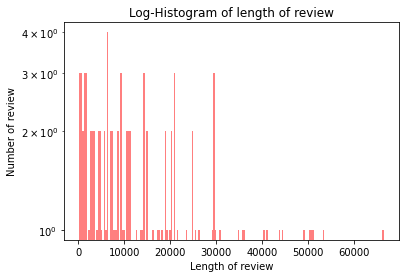

In [6]:
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

### 각 데이터의 의 단어 개수

Text(0, 0.5, 'Number of reviews')

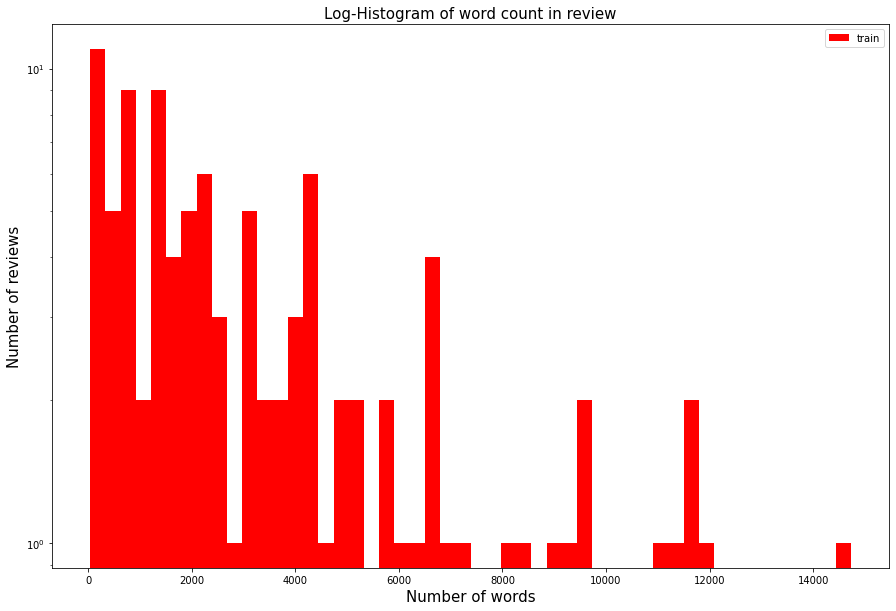

In [7]:
train_word_counts = train_data.apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.legend()
plt.xlabel('Number of words' ,fontsize=15)
plt.ylabel('Number of reviews' ,fontsize=15)

In [8]:
qmarks = np.mean(train_data.apply(lambda x: '?' in x))
fullstop = np.mean(train_data.apply(lambda x: '.' in x))
#english = np.mean(train_data.apply(lambda x: 'a'))
numbers = np.mean(train_data.apply(lambda x: max([y.isdigit() for y in x])))


print('물음표가 있는 데이터: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 데이터: {:.2f}%'.format(fullstop * 100))
#print('영어가 있는 데이터: {:.2f}%'.format(english * 100))
print('숫자가 있는 데이터: {:.2f}%'.format(numbers * 100))

물음표가 있는 데이터: 87.00%
마침표가 있는 데이터: 100.00%
숫자가 있는 데이터: 99.00%


### 불용어

In [9]:
stop_words = set(stopwords.words('english'))
stop = pd.read_csv(os.getcwd() + '\\korean_stopwords.txt', header=None, delimiter='\t')[0].tolist()
stop_words.update(stop)

### 데이터 전처리

In [10]:
def preprocessing(text, remove_stopwords = False):
    t = re.sub(pattern='[^가-힣 a-zA-Z]+', repl='', string=text)
    t = t.lower()
    words = t.split()
    
    if remove_stopwords:
        words = [w for w in words if not w in stop_words]
        
    clean_text = ' '.join(words)
    return clean_text

In [11]:
clean_train_data = []
for text in train_data:
    clean_train_data.append(preprocessing(text, remove_stopwords=True))
    
clean_train_data = pd.Series(clean_train_data, index=train_data.index, name='review')
clean_train_data.head()

UC-Zedn7a_RJyb5hUQ-aGZog    서양권 인물의 성씨로 쓰인다 자세한 내용은 머독인터넷 방송인 문서를의 번째 문단을의...
UC1dG3vI9FfHnH3YgyeKUz_A    말부터 시작한 아프리카tv의 리그 오브 레전드 bj 챌린저 정글러다 콘텐츠로 강의방...
UC1MO5uem_t8lRgvIBF9u83w    게임 영상 투고 및 게임 번역을 주로 하는 유튜버ai설이 나돌 정도로 과묵하고 묵묵...
UC1q4Ihlv_YhLELw-ijE0Diw    마인크래프트를 주로 하는 팀 샐러드 소속의 유튜버이자 트위치 스트리머마인애플은 마인...
UC2FDVyrQnjoZCUyk9fmqd9g    중순부터 본격적으로 방송을 시작한 크로아티아 출신 인터넷 방송인 일명 푸른 눈의 팟...
Name: review, dtype: object

### 라벨과 데이터 결합 후 저장

In [14]:
labels = pd.read_csv(CRAWLER_PATH + '\\labels.csv',index_col=0, engine='python', encoding = "cp949")

data = pd.concat([clean_train_data,labels], axis=1)
data.to_csv(CRAWLER_PATH + '\\train_data.csv', sep=',', na_rep='NaN', encoding='utf-8')
data.head()

,review,/m/025zzc,/m/02ntfj,/m/0b1vjn,/m/02hygl,/m/04q1x3q,/m/01sjng,/m/0403l3g,/m/021bp2,/m/022dc6,/m/03hf_rm
UC-Zedn7a_RJyb5hUQ-aGZog,서양권 인물의 성씨로 쓰인다 자세한 내용은 머독인터넷 방송인 문서를의 번째 문단을의...,True,False,False,False,False,False,True,False,False,False
UC1dG3vI9FfHnH3YgyeKUz_A,말부터 시작한 아프리카tv의 리그 오브 레전드 bj 챌린저 정글러다 콘텐츠로 강의방...,True,False,False,False,False,False,True,False,False,False
UC1MO5uem_t8lRgvIBF9u83w,게임 영상 투고 및 게임 번역을 주로 하는 유튜버ai설이 나돌 정도로 과묵하고 묵묵...,True,True,False,False,False,False,True,False,False,False
UC1q4Ihlv_YhLELw-ijE0Diw,마인크래프트를 주로 하는 팀 샐러드 소속의 유튜버이자 트위치 스트리머마인애플은 마인...,True,False,False,False,False,False,True,False,False,False
UC2FDVyrQnjoZCUyk9fmqd9g,중순부터 본격적으로 방송을 시작한 크로아티아 출신 인터넷 방송인 일명 푸른 눈의 팟...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
UCZ-UuK86Bk5sGzQQ2cEglJQ,홀라이껌원투 주키니 주키니tv에 오신 여러분들 환영합니다 다람쥐람쥐 람쥐 다람쥐 구...,True,False,True,False,False,False,True,False,False,False
UCZ0bi2aVJngKLwFTU5g_fLQ,한국의 전직 게임 개발자이자 현직 게임 관련 방송인온게임넷의 테스터 게임 플러스 켠...,True,False,False,False,False,False,True,False,False,False
UCZcD2iYy55-SkEbv3tcMZrg,샌드박스 네트워크 소속 크리에이터로 과거에는 다양한 게임을 플레이했으나 현재는 주로...,True,False,True,False,False,False,True,False,False,False
UCzoP3s16B9hP7f_qIc6DReQ,원래는 sandwich 기 기획팀장이었다 녹스의 신전 에서 도티의 방송에 처음 등장...,False,False,False,False,False,False,True,False,False,False
